<a href="https://colab.research.google.com/github/annabocharovaua/Time-Series-Analysis-Forecasting-and-Machine-Learning/blob/main/Naive_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, \
mean_absolute_error, r2_score, mean_squared_error

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

--2023-05-16 18:53:25--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K  --.-KB/s    in 0.1s    

2023-05-16 18:53:26 (1.67 MB/s) - ‘SPY.csv’ saved [251935/251935]



In [ ]:
df = pd.read_csv('SPY.csv', index_col = 'Date', parse_dates = True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [ ]:
df['ClosePrediction'] = df['Close'].shift(1)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,ClosePrediction
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,113.330002
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,113.629997
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,113.709999
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,114.190002


In [ ]:
y_true = df.iloc[1:]['Close']
y_pred = df.iloc[1:]['ClosePrediction']

# **Metrics**

In [ ]:
#SSE
(y_true - y_pred).dot(y_true - y_pred) 

6330.3742894926045

In [ ]:
#MSE
mean_squared_error(y_true, y_pred)

2.798573956451196

In [ ]:
#MSE #2
(y_true - y_pred).dot(y_true - y_pred) / len(y_true)

2.7985739564511958

In [ ]:
#RMSE
mean_squared_error(y_true, y_pred, squared=False)

1.672893886787562

In [ ]:
#RMSE #2
np.sqrt((y_true - y_pred).dot(y_true - y_pred) / len(y_true))

1.6728938867875618

In [ ]:
#MAE
mean_absolute_error(y_true, y_pred)

1.1457559803120336

In [ ]:
# R^2
r2_score(y_true, y_pred)

0.9989603259063914

In [ ]:
#MAPE
mean_absolute_percentage_error(y_true, y_pred)

0.006494073151422373

# **sMape**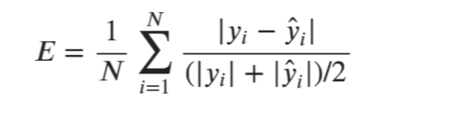

In [ ]:
def smape(y_true, y_pred) : 
  numerator = np.abs(y_true - y_pred)
  denominator = (np.abs(y_true) + np.abs(y_pred))/2
  ratio = numerator / denominator
  return ratio.mean()

smape(y_true, y_pred)

0.006491365814068417